<a href="https://colab.research.google.com/github/MuradovMaks/MNIST-/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка и чтение датасета



*   Импорт библиотек



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from keras import models
from keras import layers
import keras

In [8]:
!wget "https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv"

--2025-02-13 13:55:26--  https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 698907044 (667M) [text/csv]
Saving to: ‘A_Z_Handwritten_Data.csv.1’

A_Z_Handwritten_Dat 100%[===================>] 666.53M  14.7MB/s    in 48s     

2025-02-13 13:56:16 (13.8 MB/s) - ‘A_Z_Handwritten_Data.csv.1’ saved [698907044/698907044]



In [9]:
df = pd.read_csv('A_Z_Handwritten_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [10]:
df.shape

(372450, 785)

In [11]:
df.head(5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Наблюдаем,что первая колонка '0' содержит данные о буквах.**

* df.iloc[n] достаем данные по индексу строки
* удаляем из таблицы колонку drop('0')
* values - обьеденяет остальные данные в NumPy массив
**В результате в letters удаляем метку буквы. И группируем все числовые представления об этой букве в массив **

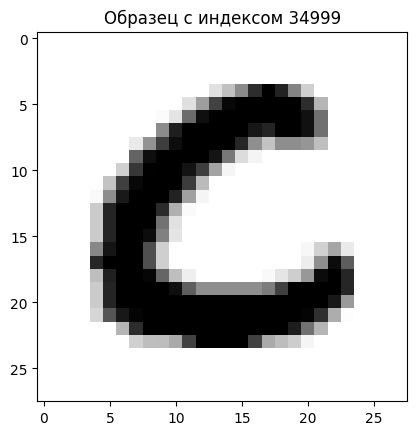

In [12]:
import numpy as np
%matplotlib inline
letter = df.iloc[34999].drop('0').values

img = letter.reshape(28,28)
fig,ax = plt.subplots(1,1)
ax.set_title("Образец с индексом 34999")
ax.imshow(img,cmap=plt.cm.binary)
plt.show()

In [13]:
print(letter)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  30
  62 116 210 255 220 124  47   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  31  97 188 247 255 255 255 255 254 210  74
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4  27 147
 240 255 255 255 255 255 255 255 237 143   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 115 225 255 255 255 255 255 232 219 255 255
 237 143   0   0   0   0   0   0   0   0   0   0   0   0   0  21 108 193
 242 255 255 255 255 217 112  59 113 113 105  64   

# Создание каркаса модели и разделение на выборки

In [14]:
from sklearn.model_selection import train_test_split
x = df.drop('0',axis=1)  # Все столбцы, кроме первого, это признаки (изображения)
y = df['0']  # Первый столбец это метки (буквы)

# Разделите данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
x_train.shape

(297960, 784)

In [16]:
x_test.shape

(74490, 784)

In [17]:
y_train.shape

(297960,)

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(26,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# Обучение модели

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 26) # Кодируем обучающие метки на 10 классов
y_test = to_categorical(y_test, 26)

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=4,batch_size=128)

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"Точность на тестовой выборке : {test_acc}")
print(f"Потери на тестовой выборке :{test_loss}" )

# Интерпретация результатов


**При использовании конструкции to categorical мы сопоставляем номер в алфавите с буквой ,и затем, при мы отображаем результат нашего предсказания, как 12 (отсчет начинается с 0),на самом деле это 13, а 13 соответсвует букве M по счету**

In [ ]:
img = x_test.iloc[:1].values
sh = img.reshape(28,28)
fig,ax = plt.subplots(1,1)
ax.imshow(sh,cmap='grey')

In [ ]:
x_t = x_test.iloc[:1]
print(x.shape)

In [ ]:
pred = model.predict(x_t)
print(f'Вектор наибольших значений: {pred}')
pred = np.argmax(pred)
print(f'Распознана буква: {pred}')
print(f'Правильное значение: {np.argmax(y_test[0])}')

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Потери на обучающей выборке')
plt.plot(epochs,val_loss,'b',label='Потери на тестовой выборке')
plt.legend()
plt.show()

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Точность на обучающей выборке')
plt.plot(epochs,val_acc,'b',label='Точность на тестовой выборке')
plt.legend()
plt.show()